# Jaykumar Patel

# Task 2: Prediction using Unsupervised ML   

# Import Modules.

In [68]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets

In [69]:
iris = pd.read_csv('F:\Study\Internship_TSF\Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
#delete a "Id" column
iris =iris.drop(columns = ['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
#to display stats about Iris Dataset
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
#to display what kind of datatype or basic info
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [73]:
#to display no. of samples on each class
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Preprocessing the Dataset

In [74]:
#check for null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

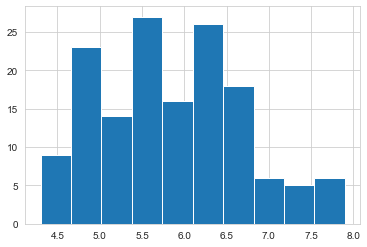

In [75]:
#histograms
iris['SepalLengthCm'].hist()

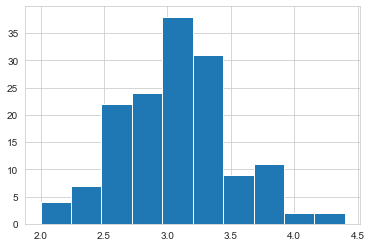

In [76]:
iris['SepalWidthCm'].hist()

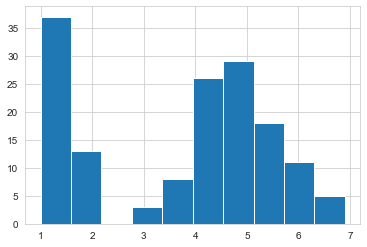

In [77]:
iris['PetalLengthCm'].hist()

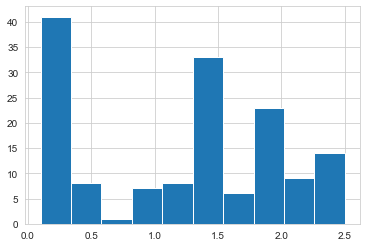

In [78]:
iris['PetalWidthCm'].hist()

# Scatter Plot

In [79]:
#scatterplot
colors = ['red','blue','green']
Species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

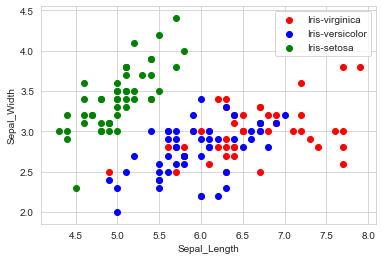

In [80]:
for i in range(3):
    x = iris[iris['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=Species[i])
    plt.xlabel("Sepal_Length")
    plt.ylabel("Sepal_Width")
    plt.legend()

# Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlations between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [81]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


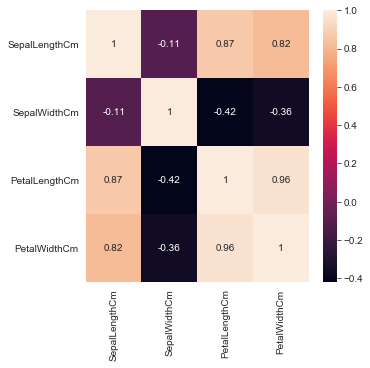

In [82]:
corr = iris.corr()
fig, ax =plt.subplots(figsize=(5,5)) #to set the size of graph.
sns.heatmap(corr, annot=True, ax = ax)

# Pair-Plot

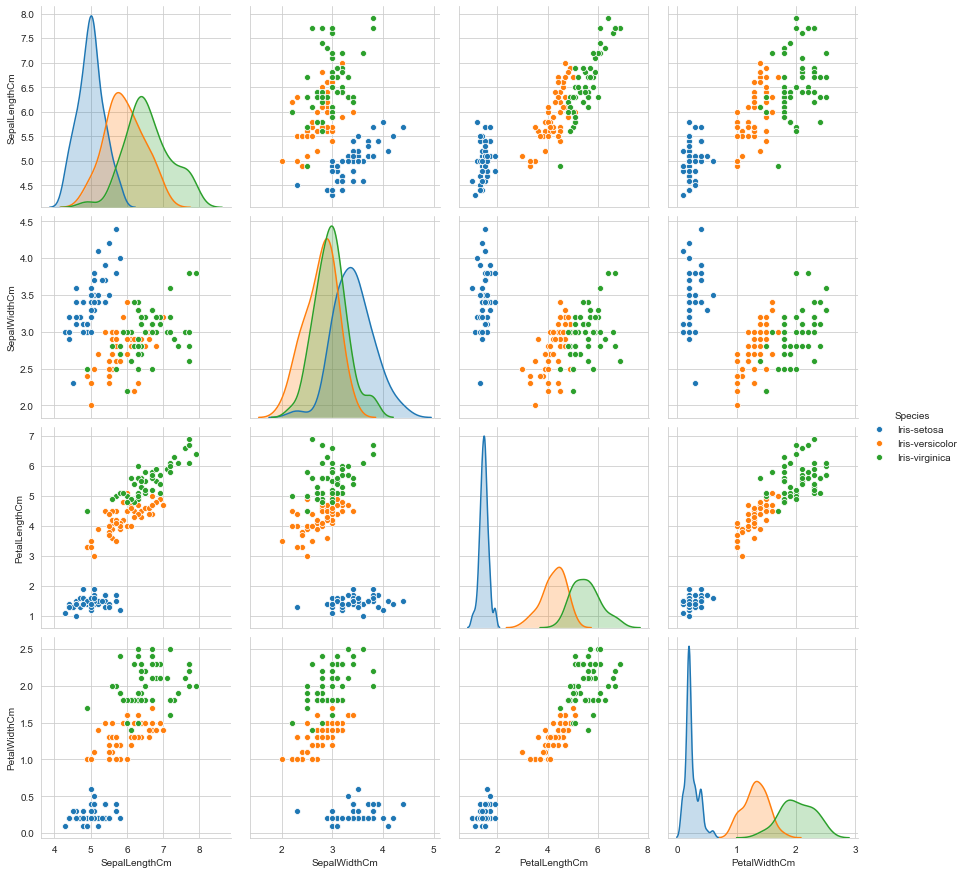

In [83]:
# Pairwise scatter plot : Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", height=3)
plt.show()

# Plotting Small Multiples of Data Subsets

FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

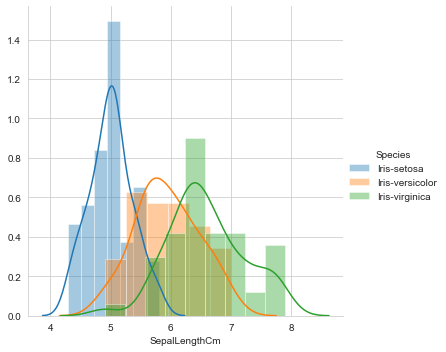

In [84]:
sns.FacetGrid(iris, hue="Species", height=5) \
    .map(sns.distplot, "SepalLengthCm") \
    .add_legend();
plt.show();
# here Seaborn distplot(sns.distplot) shows a histogram with a line on it.

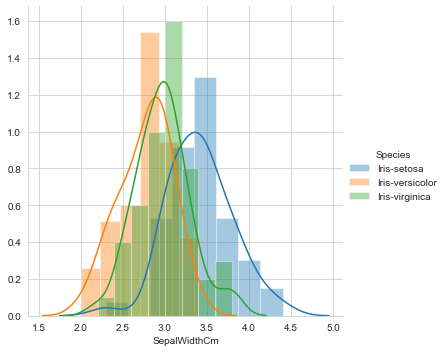

In [85]:
sns.FacetGrid(iris, hue="Species", height=5) \
    .map(sns.distplot, "SepalWidthCm") \
    .add_legend();
plt.show();

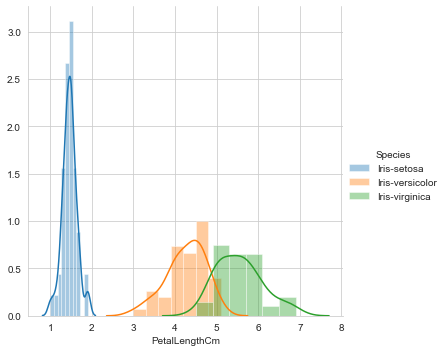

In [86]:
sns.FacetGrid(iris, hue="Species", height=5) \
    .map(sns.distplot, "PetalLengthCm") \
    .add_legend();
plt.show();

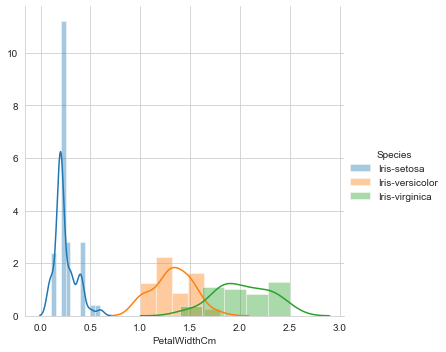

In [87]:
sns.FacetGrid(iris, hue="Species", height=5) \
    .map(sns.distplot, "PetalWidthCm") \
    .add_legend();
plt.show();

# Violin Plots

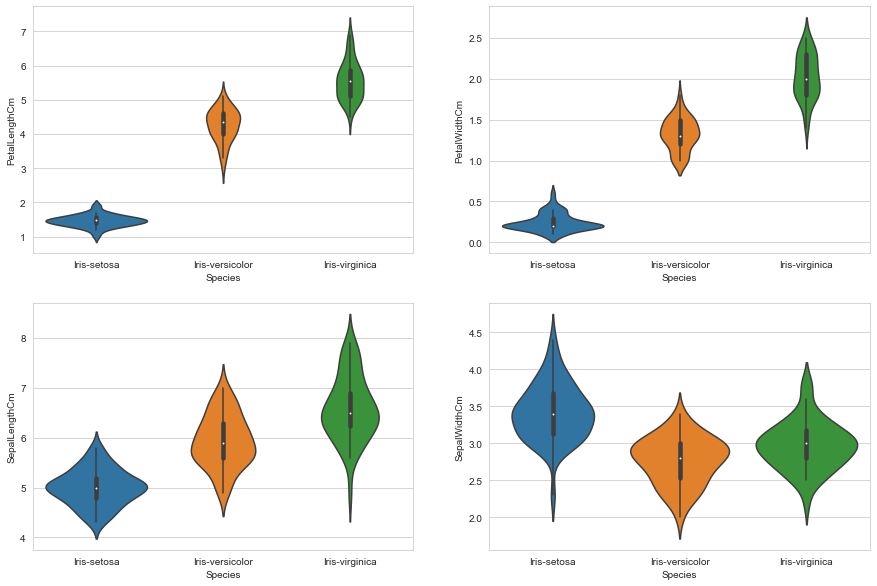

In [96]:
#A violin plot combines the 

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

plt.figure(figsize=(15,10))
plt.subplot(2, 2,1)
sns.violinplot(x='Species', y='PetalLengthCm' , data=iris)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='PetalWidthCm', data=iris)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='SepalWidthCm', data=iris)

# Multivariate probability density, contour plot.

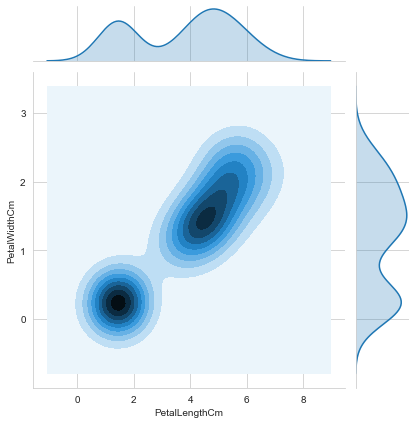

In [89]:
#2D Density plot, contors-plot
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris, kind="kde");
plt.show();

# Preparing Model 

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [91]:
train, test = train_test_split(iris, test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [92]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [93]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
3,4.6,3.1,1.5,0.2
46,5.1,3.8,1.6,0.2
66,5.6,3.0,4.5,1.5
101,5.8,2.7,5.1,1.9
6,4.6,3.4,1.4,0.3


In [94]:
train_y.head()

3          Iris-setosa
46         Iris-setosa
66     Iris-versicolor
101     Iris-virginica
6          Iris-setosa
Name: Species, dtype: object

# Training a Model

In [95]:
#selecting the algorithm
model = svm.SVC()

#training the algorithm with the training data and the training output
model.fit(train_x,train_y) 

#now we pass the testing data to the trained algorithm
prediction=model.predict(test_x) 

#now we will check the accuracy of the algorithm.
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y)) 


The accuracy of the SVM is: 0.9111111111111111


# Thank You :)